In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data() # no labels required

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_val=x_train[:-10000],x_train[-10000:]
x_train=x_train.astype("float32")/255.
x_test=x_test.astype("float32")/255.
x_val=x_val.astype("float32")/255.

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)


(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


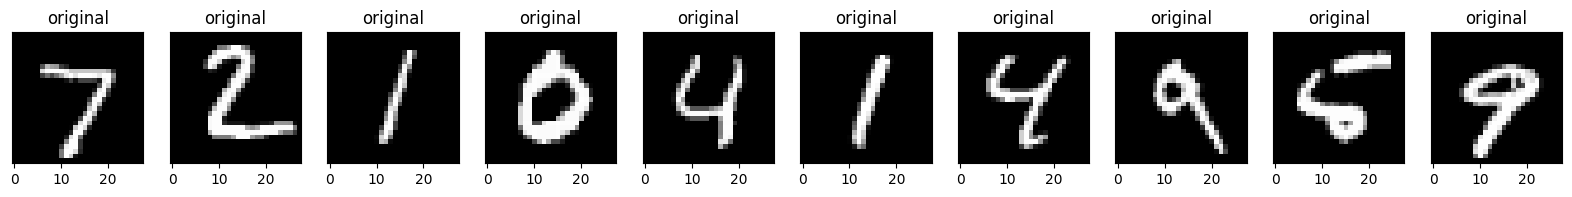

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  #ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
latent_dim=64

class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim=latent_dim

    self.encoder=tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder=tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28,28))
    ])

  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 0.0268 - val_loss: 0.0111
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0080 - val_loss: 0.0062
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

In [ ]:
print(autoencoder.encoder.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
print(autoencoder.decoder.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 50960 (199.06 KB)
Trainable params: 50960 (199.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

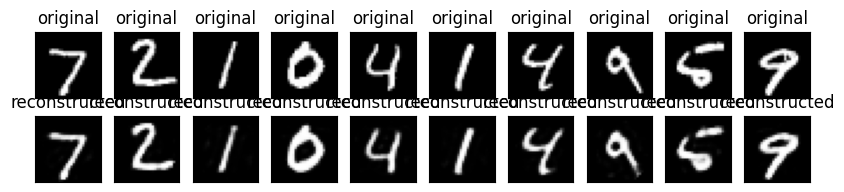

In [ ]:
n=10
plt.figure(figsize=(10,2))
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

https://www.youtube.com/watch?v=XrykiaS_eOs